# Estudi Mean Shift

### Lectura fitxer estudi

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df_students = pd.read_csv("C:/Users/jesus/github-classroom/DCC-UAB/ACproject-07/datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

In [5]:
df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [6]:
def sampleig_dataset(dataset, frac):
    dataset = dataset.sample(frac=frac).reset_index(drop=True)
    return dataset

In [12]:
frac_train = 0.7
frac_test = 0.3

X_train = sampleig_dataset(df_numerical, frac_train)
X_test = sampleig_dataset(df_students, frac_test)

In [13]:
# Estandarització dades
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

### Aplicació Model

In [14]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [15]:
# Estimar el valor de bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


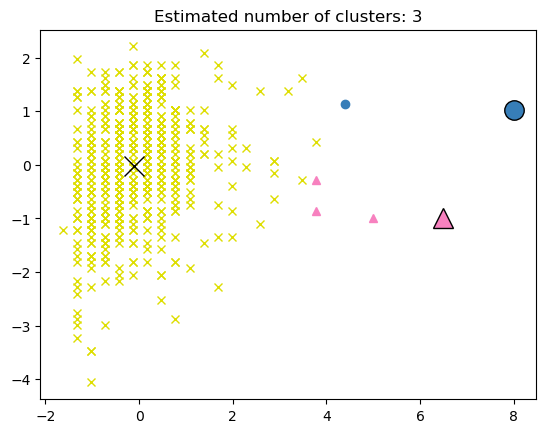

In [16]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()